## <center>Assignment 1</center>

**Abeysinghe W.A.M.S.Y**   
**190014F**

## 1. Loading the Dataset

In [7]:
import pandas as pd

In [8]:
# Load the dataset
data = pd.read_csv('../housing.csv')
print(data.head())

   Unnamed: 0  Order        PID  MS SubClass MS Zoning  Lot Frontage  \
0           0      1  526301100           20        RL         141.0   
1           1      2  526350040           20        RH          80.0   
2           2      3  526351010           20        RL          81.0   
3           3      4  526353030           20        RL          93.0   
4           4      5  527105010           60        RL          74.0   

   Lot Area Street Alley Lot Shape  ... Pool Area Pool QC  Fence Misc Feature  \
0     31770   Pave   NaN       IR1  ...         0     NaN    NaN          NaN   
1     11622   Pave   NaN       Reg  ...         0     NaN  MnPrv          NaN   
2     14267   Pave   NaN       IR1  ...         0     NaN    NaN         Gar2   
3     11160   Pave   NaN       Reg  ...         0     NaN    NaN          NaN   
4     13830   Pave   NaN       IR1  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type Sale Condition  SalePrice  
0        0     

## 2. Preprocessing

#### 2.1. Removing NaNs

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# Select independent features and the target
features = ['Lot Area', 'Garage Yr Blt', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Pool Area']
target = ['SalePrice']

# Remove rows with missing values in target and features.
cleanData = data.dropna(subset= features + target)

X_clean = cleanData[features].to_numpy()
y_clean = cleanData[target].to_numpy()

In [19]:
print(data.shape)
print(cleanData.shape)

(2930, 83)
(2771, 83)


**The train test split is done before the outlier detection and the Data Analysis part done below. The reason is to be more closer to what the model can experience in the real world data. In a real world dataset, doing a outlier detection on the test data that we will be recieving after fitting the model might not be practical.**  

**And this also allows us to visulize how the model handles outliers**

In [23]:
# Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=1)

#### 2.2. Plotting Data and Analysing

In [26]:
import numpy as np
import matplotlib.pyplot as plt

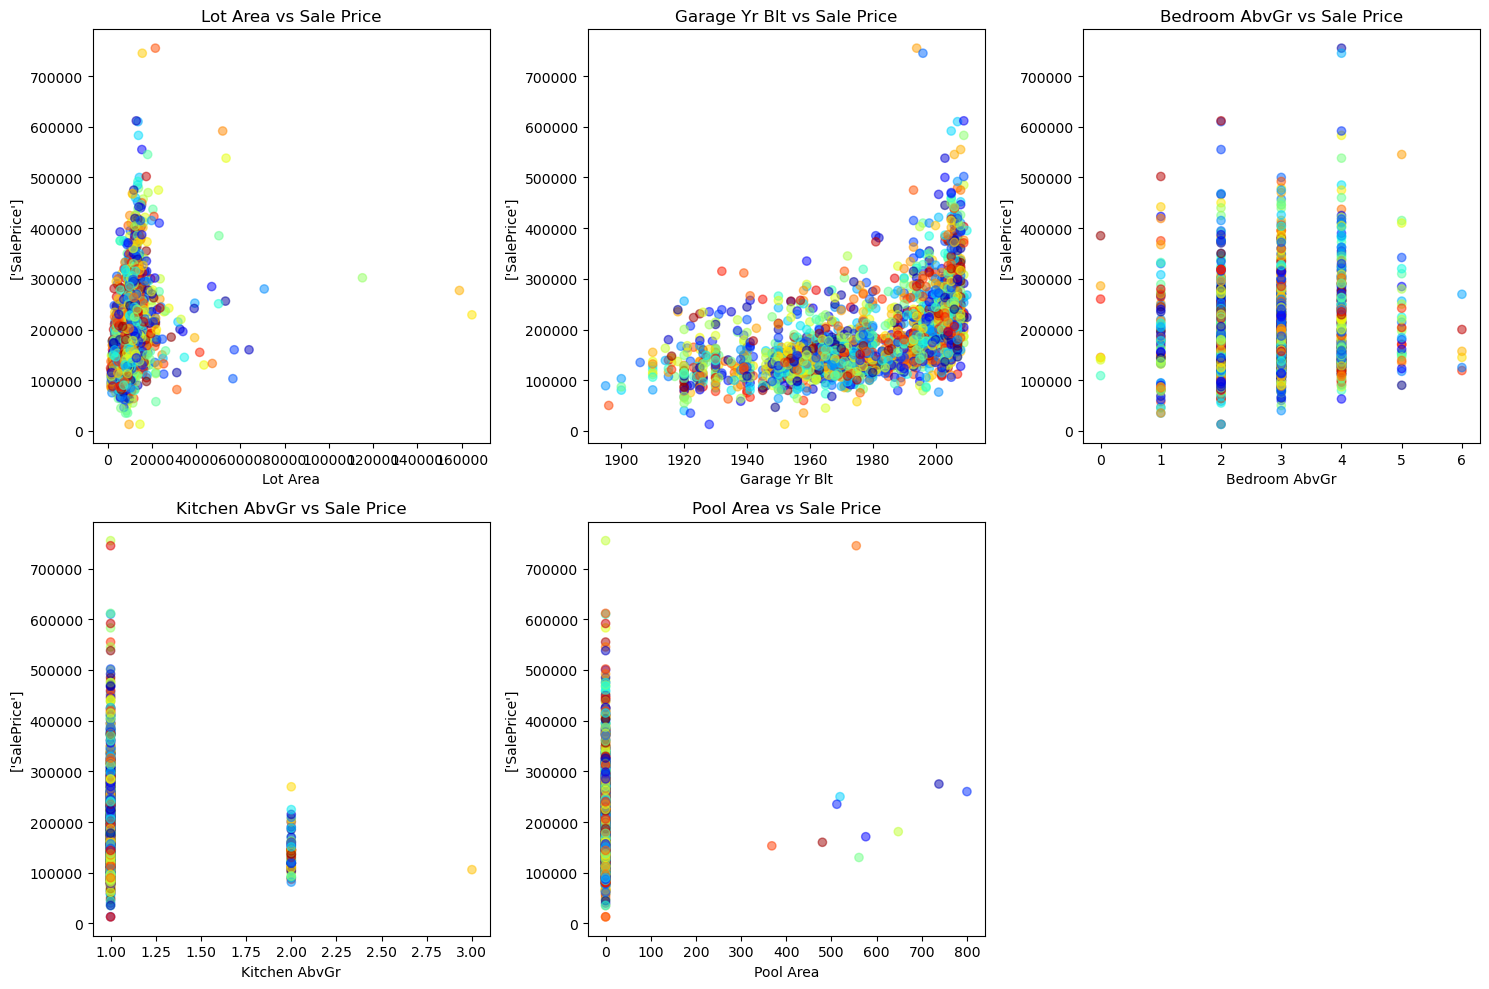

In [25]:
# Plot features vs sale prices
plt.figure(figsize=(15, 10))

# Plot each feature against the sale price
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train[:,i], y_train, alpha=0.5,c= np.random.rand(len(y_train)),cmap='jet')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('{} vs Sale Price'.format(feature))

plt.tight_layout()
plt.show()

#### 2.3. Outlier Removal